# Customer Personality Analysis

## a.About Dataset

**Context**

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


## b.Content
**Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

## c.Target ##

Need to perform clustering to summarize customer segments.

# **Customer Personality Segmentation Clustering Project**

## 1.Import libraries

In [ ]:
#Data analysis libraries
import numpy as np
import pandas as pd
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Load DataSet

In [ ]:
#Load dataset "marketing_campaign.csv".Use Tab Separator (sep='\t'):
df_mark_camp = pd.read_csv('/content/marketing_campaign.csv',sep='\t')

In [ ]:
#Verify dataset content:
df_mark_camp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Verify data type:
df_mark_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* Most variables are numeric. 

* 'Education' and 'Marital_Status' are categorical variable. 

* 'Dt_customer' could be changed from 'object' to 'datetime'.

## 3.Handling null values

In [ ]:
#Count all null values
df_mark_camp.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 null values for 'Income' variable. These null values are samller than general data (2240 values), so we can delete them.

In [ ]:
#Remove missing values:
df_mark_camp.dropna(inplace=True)

In [ ]:
#Check again for null values:
df_mark_camp.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

We can check that there isn't any null values. Then we need to check for duplicate values in DataFrame.

## 4.Check duplicate values

In [ ]:
df_mark_camp[df_mark_camp.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


After checking, there isn't any duplicate values.

## 5.Data Cleaning and Manipulation

### 5.1.Transformation and preprocessing of categorical data

In [ ]:
#Create a duplicate dataframe:
df_mark_camp_transformed = df_mark_camp.copy(deep=True)
df_mark_camp_transformed

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
#Check for each value of categorical variable:
print('Education Values:\n',df_mark_camp_transformed['Education'].value_counts())
print('\nMarital_Status Values:\n',df_mark_camp_transformed['Marital_Status'].value_counts())

Education Values:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Marital_Status Values:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


**OBS**:

* For 'Education', we can reduce to 'Basic' and 'Higher_education' values.
* For 'Marital_Status', we can reduce to 'Single' and 'Relationship' values.

In [ ]:
#Reduce 'Education' variable values:
df_mark_camp_transformed['Education'] = df_mark_camp_transformed['Education'].replace(['Graduation','PhD','Master','2n Cycle'],'Higher_education')
#Check 'Education' variable values:
df_mark_camp_transformed['Education'].value_counts()

Higher_education    2162
Basic                 54
Name: Education, dtype: int64

In [ ]:
#Reduce 'Education' variable values:
df_mark_camp_transformed['Marital_Status'] = df_mark_camp_transformed['Marital_Status'].replace(['Married','Together'],'Relationship')
df_mark_camp_transformed['Marital_Status'] = df_mark_camp_transformed['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')
#Check 'Education' variable values:
df_mark_camp_transformed['Marital_Status'].value_counts()

Relationship    1430
Single           786
Name: Marital_Status, dtype: int64

### 5.2.Convert categorical variable to datetime

In [ ]:
#Check 'Dt_Customer' variable values:
df_mark_camp_transformed['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

**OBS:**

* Need to change 'Dt_Customer' from object to datetime, and then create two aditional columns: 'Year_Customer' and 'Month_Customer'

In [ ]:
df_mark_camp_transformed['Dt_Customer'] = pd.to_datetime(df_mark_camp_transformed['Dt_Customer'],dayfirst=True, format='%d/%m/%Y',infer_datetime_format=True)
df_mark_camp_transformed['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [ ]:
df_mark_camp_transformed['Year_Customer'] = pd.DatetimeIndex(df_mark_camp_transformed['Dt_Customer']).year
df_mark_camp_transformed['Month_Customer'] = pd.DatetimeIndex(df_mark_camp_transformed['Dt_Customer']).month

In [ ]:
#Check new columns:
df_mark_camp_transformed

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer
0,5524,1957,Higher_education,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,2012,9
1,2174,1954,Higher_education,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2014,3
2,4141,1965,Higher_education,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2013,8
3,6182,1984,Higher_education,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,2014,2
4,5324,1981,Higher_education,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Higher_education,Relationship,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,2013,6
2236,4001,1946,Higher_education,Relationship,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,2014,6
2237,7270,1981,Higher_education,Single,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,2014,1
2238,8235,1956,Higher_education,Relationship,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,2014,1


### 5.3.Convert categorical variable to numeric

In [ ]:
#Get Dummies for "Education":
dummies_education = pd.get_dummies(df_mark_camp_transformed.Education)
df_mark_camp_transformed = pd.concat([df_mark_camp_transformed,dummies_education],axis='columns')
df_mark_camp_transformed =df_mark_camp_transformed.drop(['Education',],axis='columns')

In [ ]:
#Also drop one of the dummies columns, for example 'Basic':
df_mark_camp_transformed =df_mark_camp_transformed.drop(['Basic',],axis='columns')
df_mark_camp_transformed

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Higher_education
0,5524,1957,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,1,2012,9,1
1,2174,1954,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,0,2014,3,1
2,4141,1965,Relationship,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,2013,8,1
3,6182,1984,Relationship,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,0,2014,2,1
4,5324,1981,Relationship,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,0,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Relationship,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,3,11,0,2013,6,1
2236,4001,1946,Relationship,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,3,11,0,2014,6,1
2237,7270,1981,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,3,11,0,2014,1,1
2238,8235,1956,Relationship,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,3,11,0,2014,1,1


In [ ]:
#Get dummies for 'Marital_Status':
dummies_Marital_Status = pd.get_dummies(df_mark_camp_transformed.Marital_Status)
df_mark_camp_transformed = pd.concat([df_mark_camp_transformed,dummies_Marital_Status],axis='columns')
df_mark_camp_transformed =df_mark_camp_transformed.drop(['Marital_Status','Relationship'],axis='columns')
df_mark_camp_transformed

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Higher_education,Single
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,0,3,11,1,2012,9,1,1
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,3,11,0,2014,3,1,1
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,3,11,0,2013,8,1,0
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,3,11,0,2014,2,1,0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,3,11,0,2014,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,2013-06-13,46,709,43,182,...,0,0,0,3,11,0,2013,6,1,0
2236,4001,1946,64014.0,2,1,2014-06-10,56,406,0,30,...,1,0,0,3,11,0,2014,6,1,0
2237,7270,1981,56981.0,0,0,2014-01-25,91,908,48,217,...,0,0,0,3,11,0,2014,1,1,1
2238,8235,1956,69245.0,0,1,2014-01-24,8,428,30,214,...,0,0,0,3,11,0,2014,1,1,0


It is recomend to join 'Kidhome' and 'Teenhome' in a single column 'Children'.

In [ ]:
#Join 'Kidhome' and 'Teenhome' as 'Children':
df_mark_camp_transformed['Children'] = df_mark_camp_transformed['Kidhome'] + df_mark_camp_transformed['Teenhome']

#Drop 'ID', 'Kidhome' and 'Teenhome':
df_mark_camp_transformed = df_mark_camp_transformed.drop(['ID','Kidhome','Teenhome'],axis='columns')

In [ ]:
#Check content:
df_mark_camp_transformed

,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Higher_education,Single,Children
0,1957,58138.0,2012-09-04,58,635,88,546,172,88,88,...,0,0,3,11,1,2012,9,1,1,0
1,1954,46344.0,2014-03-08,38,11,1,6,2,1,6,...,0,0,3,11,0,2014,3,1,1,2
2,1965,71613.0,2013-08-21,26,426,49,127,111,21,42,...,0,0,3,11,0,2013,8,1,0,0
3,1984,26646.0,2014-02-10,26,11,4,20,10,3,5,...,0,0,3,11,0,2014,2,1,0,1
4,1981,58293.0,2014-01-19,94,173,43,118,46,27,15,...,0,0,3,11,0,2014,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,2013-06-13,46,709,43,182,42,118,247,...,0,0,3,11,0,2013,6,1,0,1
2236,1946,64014.0,2014-06-10,56,406,0,30,0,0,8,...,0,0,3,11,0,2014,6,1,0,3
2237,1981,56981.0,2014-01-25,91,908,48,217,32,12,24,...,0,0,3,11,0,2014,1,1,1,0
2238,1956,69245.0,2014-01-24,8,428,30,214,80,30,61,...,0,0,3,11,0,2014,1,1,0,1


### 5.4.Unique values in each variable

In [ ]:
#Check for unique values in dataframe:
df_mark_camp_transformed.nunique()

Year_Birth               59
Income                 1974
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Year_Customer             3
Month_Customer           12
Higher_education          2
Single                    2
Children                  4
dtype: int64

* We can remove 'Z_CostContact' and 'Z_Revenue' because they have the same value in all rows.

* Also we can remove 'Dt_Customer'.

In [ ]:
df_mark_camp_transformed = df_mark_camp_transformed.drop(['Z_CostContact','Z_Revenue','Dt_Customer'],axis='columns')
df_mark_camp_transformed

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Customer,Month_Customer,Higher_education,Single,Children
0,1957,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,0,1,2012,9,1,1,0
1,1954,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,0,2014,3,1,1,2
2,1965,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,0,2013,8,1,0,0
3,1984,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,0,2014,2,1,0,1
4,1981,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,0,2014,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,46,709,43,182,42,118,247,2,...,0,0,0,0,0,2013,6,1,0,1
2236,1946,64014.0,56,406,0,30,0,0,8,7,...,0,1,0,0,0,2014,6,1,0,3
2237,1981,56981.0,91,908,48,217,32,12,24,1,...,0,0,0,0,0,2014,1,1,1,0
2238,1956,69245.0,8,428,30,214,80,30,61,2,...,0,0,0,0,0,2014,1,1,0,1


## 6.Distribution Analysis

In [ ]:
#Check some stadistics:
df_mark_camp_transformed.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Customer,Month_Customer,Higher_education,Single,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,...,0.073105,0.064079,0.013538,0.009477,0.150271,2013.028430,6.465253,0.975632,0.354693,0.947202
std,11.985554,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,...,0.260367,0.244950,0.115588,0.096907,0.357417,0.685618,3.489767,0.154224,0.478528,0.749062
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,1.000000,0.000000,0.000000
50%,1970.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,6.000000,1.000000,0.000000,1.000000
75%,1977.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,10.000000,1.000000,1.000000,1.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,12.000000,1.000000,1.000000,3.000000


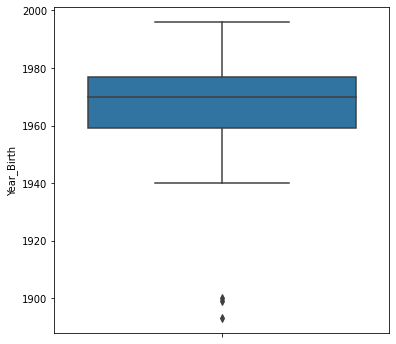

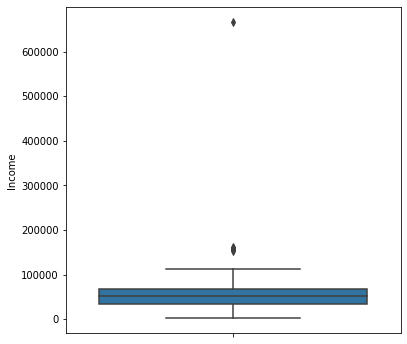

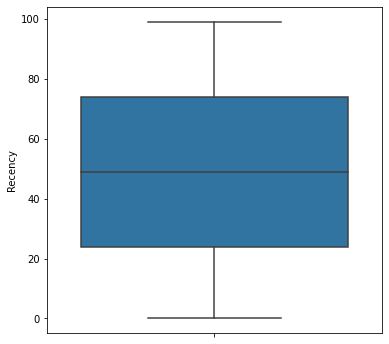

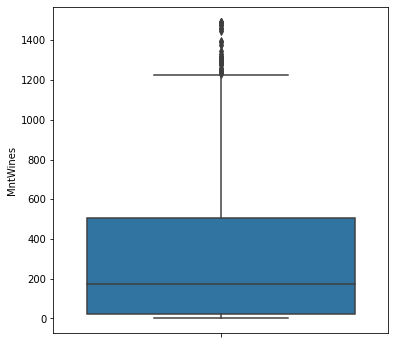

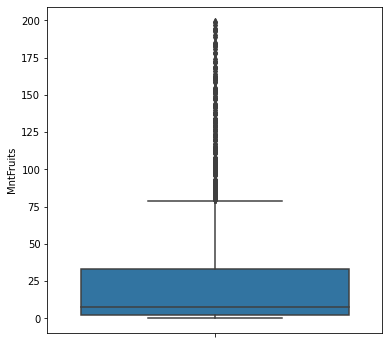

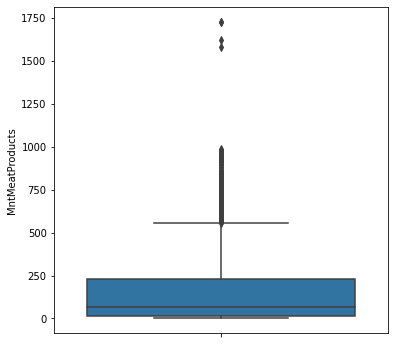

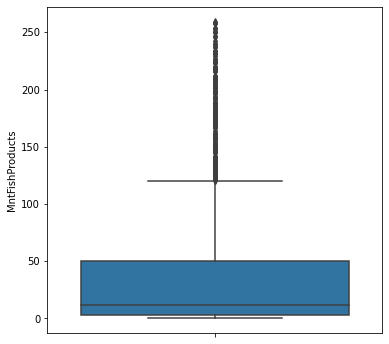

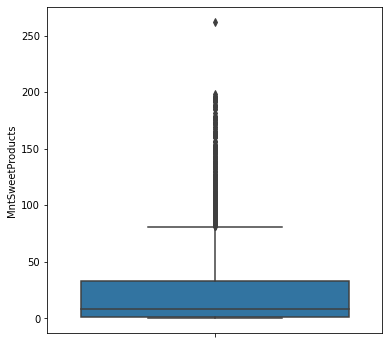

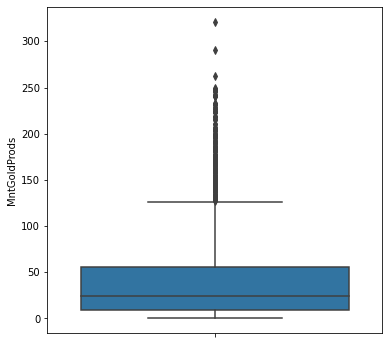

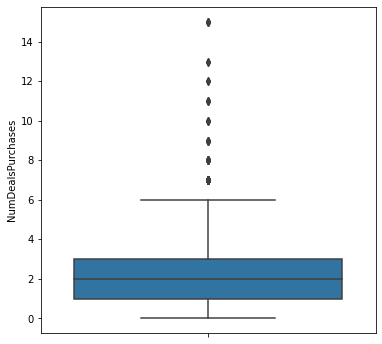

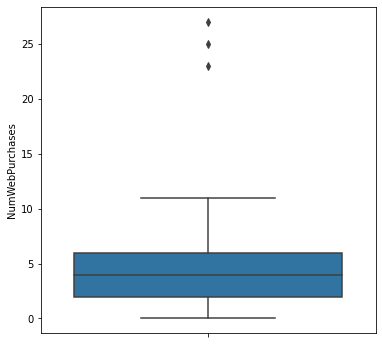

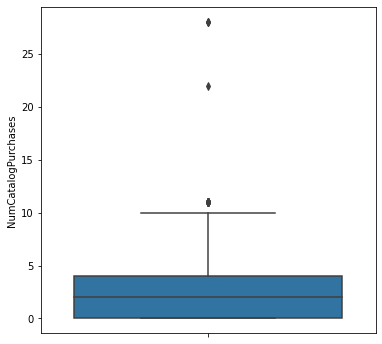

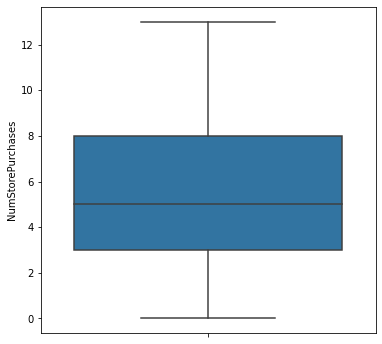

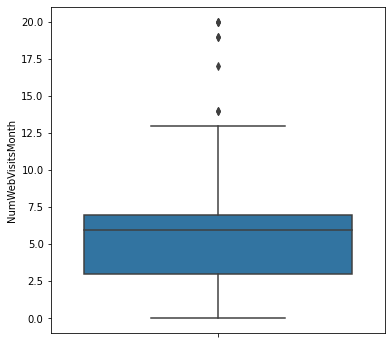

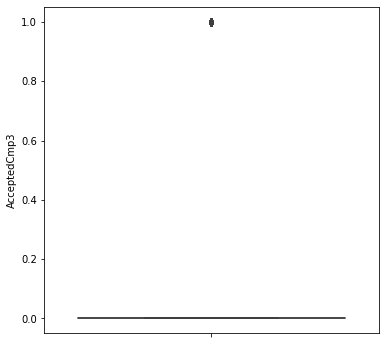

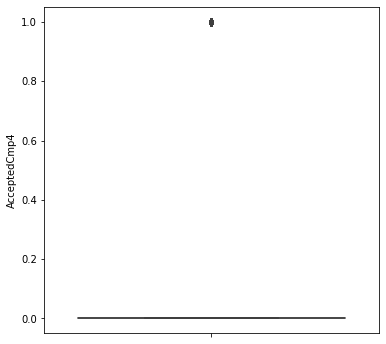

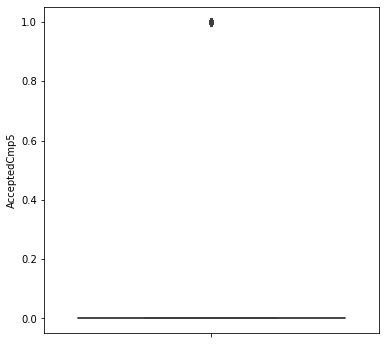

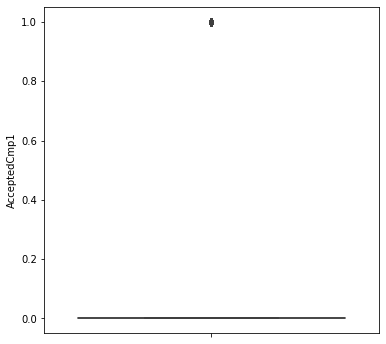

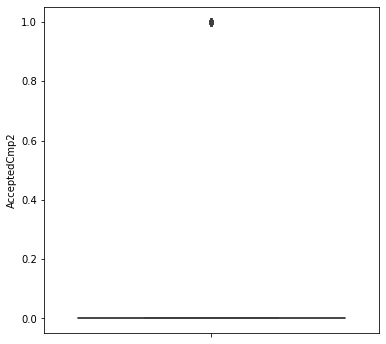

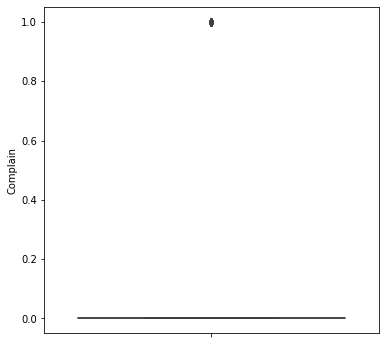

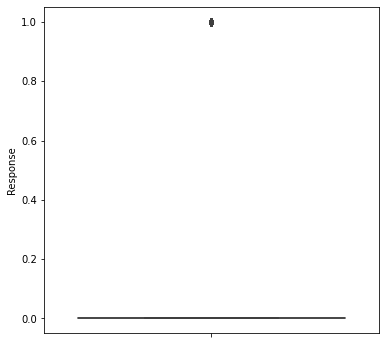

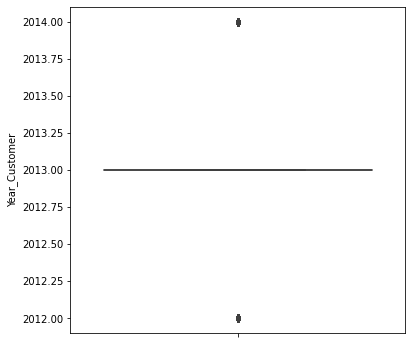

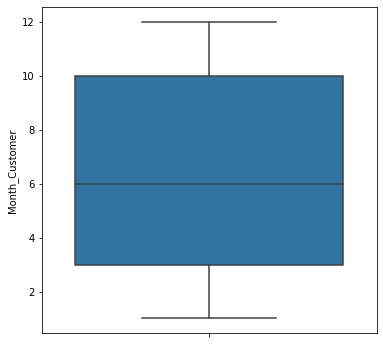

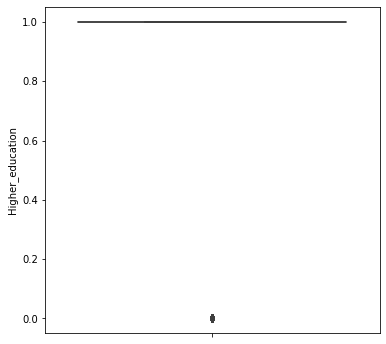

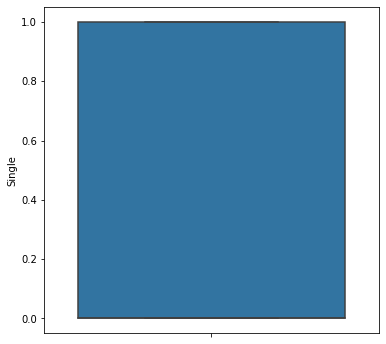

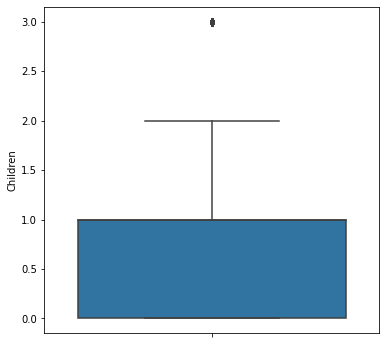

In [ ]:
#Check outliers:
df_column = df_mark_camp_transformed.columns
#Boxplot Graphics:
for i in df_column:
  plt.figure(figsize=(6,6))
  sns.boxplot(data=df_mark_camp_transformed, y=i)
  plt.show()


**OBS:**

* There is a posible outlier in 'Income' column. Value 666666 could be an erronus data or typo. we can remove this data.

* Also, for 'Year_birth' Column, there are 3 outliers that are less than 1900. these values could be a Typo. We can remove these data.

In [ ]:
# Verify Outlier in 'Income' column:
df_mark_camp_transformed[df_mark_camp_transformed['Income']>300000]

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Customer,Month_Customer,Higher_education,Single,Children
2233,1977,666666.0,23,9,14,18,8,1,12,4,...,0,0,0,0,0,2013,6,1,0,1


In [ ]:
#Remov outlier in 'Income' column:
df_mark_camp_transformed = df_mark_camp_transformed.drop(axis=0, index=2233)

In [ ]:
# Verify Outlier in 'Year_Birth' column:
df_mark_camp_transformed[df_mark_camp_transformed['Year_Birth']<=1900]

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Customer,Month_Customer,Higher_education,Single,Children
192,1900,36640.0,99,15,6,8,7,4,25,1,...,0,0,0,1,0,2013,9,1,1,1
239,1893,60182.0,23,8,0,5,7,0,2,1,...,0,0,0,0,0,2014,5,1,1,1
339,1899,83532.0,36,755,144,562,104,64,224,1,...,1,0,0,0,0,2013,9,1,0,0


In [ ]:
#Remov outlier in 'Year_Birth' column:
df_mark_camp_transformed = df_mark_camp_transformed.drop(axis=0, index=[192,239,339])

**OBS:**

* Before distribution analysis, it is recomended to reduce or join common columns.

* For example, products could be reduced from 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts' to only 'Food' Column.

* Another reduction could be for 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5' and 'Response' to only 'campaign'

In [ ]:
#Create 'Food' column:
df_mark_camp_transformed['Food'] = (df_mark_camp_transformed['MntWines'] + df_mark_camp_transformed['MntFruits']
                                    + df_mark_camp_transformed['MntMeatProducts'] + df_mark_camp_transformed['MntFishProducts']
                                    + df_mark_camp_transformed['MntSweetProducts'])
#Delete "MntWines, MntFruits, MntMeatProducts, MntFishProducts and MntSweetProducts" Columns:
df_mark_camp_transformed = df_mark_camp_transformed.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts'],axis='columns')

In [ ]:
#Create 'Campaign' column:
df_mark_camp_transformed['Campaign'] = (df_mark_camp_transformed['AcceptedCmp1'] + df_mark_camp_transformed['AcceptedCmp2']
                                    + df_mark_camp_transformed['AcceptedCmp3'] + df_mark_camp_transformed['AcceptedCmp4']
                                    + df_mark_camp_transformed['AcceptedCmp5'] + df_mark_camp_transformed['Response'])
#Delete all 'AcceptedCmp' and 'Response' columns:
df_mark_camp_transformed = df_mark_camp_transformed.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis='columns')

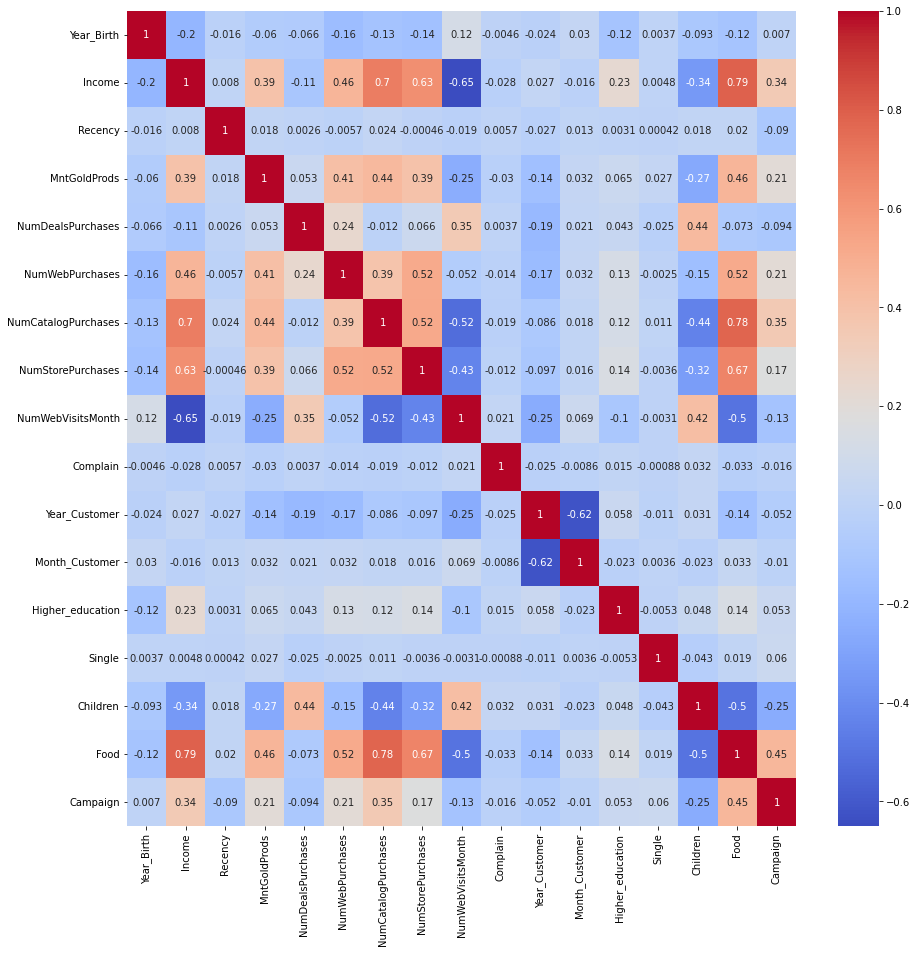

In [ ]:
#Heatmap for correlation:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_mark_camp_transformed.corr(),annot=True, cmap='coolwarm')
plt.show()

**OBS:**
* We can delete some columns like 'Year_Birth', 'Recency', 'Complain and 'Single' because of lower correlation in DataSet.

In [ ]:
#Delete 'Year_Birth', 'Recency', 'Complain and 'Single':
df_mark_camp_transformed = df_mark_camp_transformed.drop(['Year_Birth','Recency','Complain','Single'],axis='columns')

## 7.Escalate data

In [ ]:
#Import StandardScaler:
from sklearn.preprocessing import StandardScaler
#Creat Object:
STscaler =StandardScaler()
#Apply onject to DF:
df_mark_camp_scaled = STscaler.fit_transform(df_mark_camp_transformed)

In [ ]:
#Change from Scaled array to DataFrame:
df_mark_camp_scaled = pd.DataFrame(df_mark_camp_scaled, columns=df_mark_camp_transformed.columns)
df_mark_camp_scaled

,Income,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Year_Customer,Month_Customer,Higher_education,Children,Food,Campaign
0,0.287105,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-1.499086,0.726456,0.158187,-1.264598,1.674153,0.617244
1,-0.260882,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.417341,-0.992176,0.158187,1.404572,-0.940254,-0.502808
2,0.913196,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.040872,0.440018,0.158187,-1.264598,0.295868,-0.502808
3,-1.176114,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,1.417341,-1.278615,0.158187,0.069987,-0.893444,-0.502808
4,0.294307,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,1.417341,-1.565054,0.158187,0.069987,-0.271049,-0.502808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.430444,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,-0.040872,-0.132860,0.158187,0.069987,0.919997,-0.502808
2208,0.560123,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,1.417341,-0.132860,0.158187,2.739158,-0.220772,0.617244
2209,0.233347,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,1.417341,-1.565054,0.158187,-1.264598,1.133241,0.617244
2210,0.803172,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,1.417341,-1.565054,0.158187,0.069987,0.379085,-0.502808


## 8.PCA (Principal Component Analysis)

In [ ]:
#Import PCA:
from sklearn.decomposition import PCA

In [ ]:
#Crear PCA object:
pca = PCA()
#Apply PCA to DF:
pca.fit(df_mark_camp_scaled)
df_mark_camp_scaled = pca.transform(df_mark_camp_scaled)

In [ ]:
#Need to check hoy many dimension will be reduced:
#Calculate variance ratio:
var = pca.explained_variance_ratio_
print('Variance Ratio:\n',var)

Variance Ratio:
 [0.35118349 0.14827576 0.1113625  0.07672266 0.07022489 0.0545653
 0.04798789 0.03806162 0.03057079 0.02669699 0.01893715 0.01523705
 0.01017392]


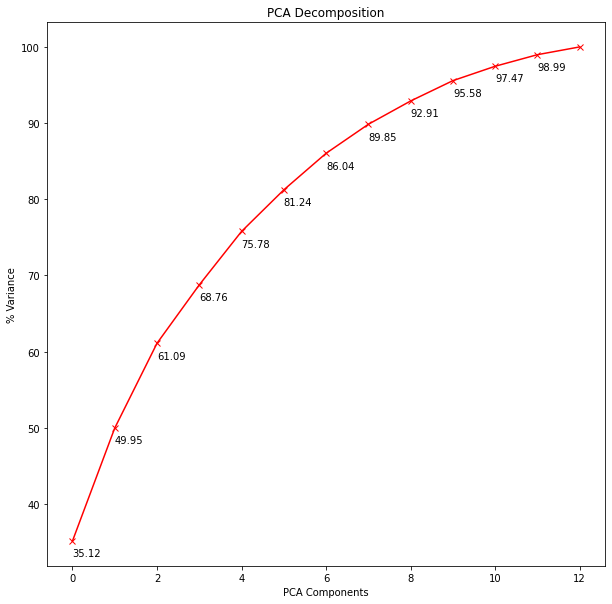

In [ ]:
#Plot cumulative variance:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
components = list(range(0,12))
plt.figure(figsize=(10,10))

for s,d in zip(components,cum_var):
    plt.annotate(np.round(d,decimals=2), xy=(s,d-2))

plt.plot(cum_var,'r-x')
plt.title('PCA Decomposition')
plt.xlabel('PCA Components')
plt.ylabel('% Variance')
plt.show()


**OBS:** PCA Decomposition show that with 8 components, we have more than 90% variance.

In [ ]:
#Create DataFrame from df_mark_camp_scaled:
df_mark_camp_standard = pd.DataFrame(df_mark_camp_scaled)
#Skip last 4 components:
df_mark_camp_standard.drop([9,10,11,12], axis=1,inplace=True)

In [ ]:
#Check df_mark_camp_standard reduced:
df_mark_camp_standard

,0,1,2,3,4,5,6,7,8
0,2.558564,1.907416,-0.849753,0.689250,0.747354,0.467226,-0.067764,1.467818,1.700974
1,-2.138551,-1.672304,1.061569,-0.369480,0.112621,-0.512167,-0.722255,-0.329901,0.342341
2,1.698981,-0.030183,-0.368744,-0.466344,-0.853904,0.550810,1.578782,-0.560715,-0.016942
3,-2.084039,-1.696052,0.811564,0.180489,0.032263,0.383826,0.328674,0.355547,-0.263275
4,-0.219915,-0.892559,2.190502,0.361005,-0.447415,-0.449328,0.302294,0.743431,0.222293
...,...,...,...,...,...,...,...,...,...
2207,1.914383,0.979471,0.750149,0.831491,-0.775973,2.839457,-1.642337,-1.175149,1.014522
2208,-0.845368,1.283905,3.292222,0.328955,0.637346,-1.709703,-0.184254,-1.148074,0.783025
2209,1.470433,-1.971669,0.592270,0.587753,0.215068,0.033087,1.300601,0.710960,-1.875024
2210,1.652195,-1.501602,1.734128,0.109584,-0.974313,0.007388,0.298642,-0.169545,-0.078354


**OBS:**
* Consider that we have reduced the dataset to only 9 principal components, in order to maintain more than 90% variance.
* We are aware that information is being lost from the other columns (9,10,11,12), but for clustering is much better to have little information to process.

## 9.Clustering:

In [ ]:
#Import libraries:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### 9.1.KMeans with PCA

In [ ]:
#Iterate different values of K:
sum_of_squared_distances = []
silhouette_scores = []
K = range (2,15)
for i in K:
  Km = KMeans(n_clusters = i, n_init="auto")
  y = Km.fit_predict(df_mark_camp_standard) #PCA Dataset
  sum_of_squared_distances.append(Km.inertia_)
  silhouette_scores.append(silhouette_score(df_mark_camp_standard,y))

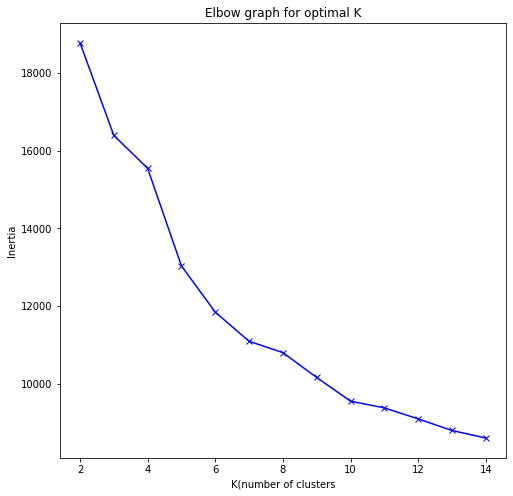

In [ ]:
#Elbow graph to visualize optimal K:
fig = plt.figure(figsize=(8,8))
plt.plot(K,sum_of_squared_distances, 'bx-')
plt.title('Elbow graph for optimal K')
plt.xlabel('K(number of clusters')
plt.ylabel('Inertia')
plt.show()

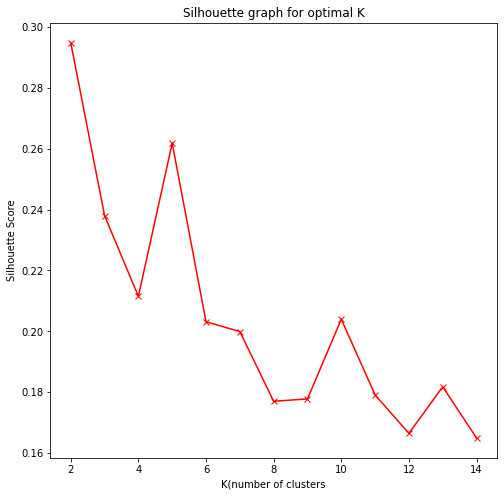

In [ ]:
#Silhouette plot to visualize optimal K:
fig = plt.figure(figsize=(8,8))
plt.plot(K,silhouette_scores, 'rx-')
plt.title('Silhouette graph for optimal K')
plt.xlabel('K(number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
#Apply KMeans with K=4:
Km = KMeans(n_clusters = 4, n_init="auto")
y = Km.fit_predict(df_mark_camp_standard)
#Add prediction 'y' to original DF:
df_mark_camp_transformed['k_means_pca'] = y

**OBS:**
* From **Elbow graph** and **Silhouette Score**, optimal K is between 4 and 6.

### 9.2.KMeans **without** PCA

In [ ]:
#Iterate different values of K:
sum_of_squared_distances = []
silhouette_scores = []
K = range (2,15)
for i in K:
  Km = KMeans(n_clusters = i, n_init="auto")
  y = Km.fit_predict(df_mark_camp_scaled) #PCA with out Dataset
  sum_of_squared_distances.append(Km.inertia_)
  silhouette_scores.append(silhouette_score(df_mark_camp_scaled,y))

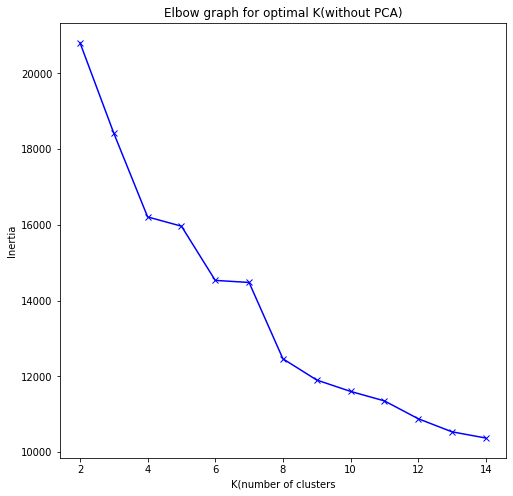

In [ ]:
#Elbow graph to visualize optimal K (without PCA)
fig = plt.figure(figsize=(8,8))
plt.plot(K,sum_of_squared_distances, 'bx-')
plt.title('Elbow graph for optimal K(without PCA)')
plt.xlabel('K(number of clusters')
plt.ylabel('Inertia')
plt.show()

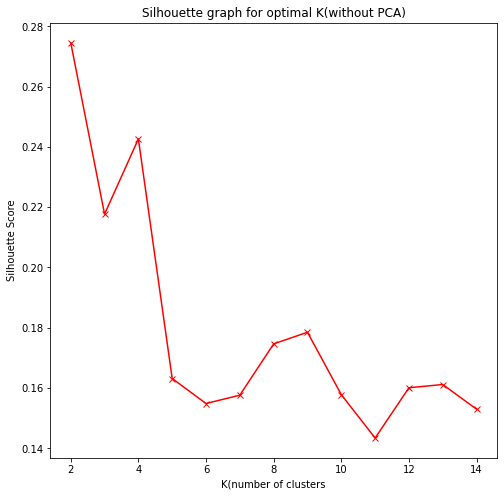

In [ ]:
#Silhouette plot to visualize optimal K(without PCA):
fig = plt.figure(figsize=(8,8))
plt.plot(K,silhouette_scores, 'rx-')
plt.title('Silhouette graph for optimal K(without PCA)')
plt.xlabel('K(number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
#Apply KMeans with K=4:
Km = KMeans(n_clusters = 4, n_init="auto")
y = Km.fit_predict(df_mark_camp_transformed)

#Add prediction 'y' to original DF:
df_mark_camp_transformed['k_means'] = y

**OBS:**
* From **Elbow graph** and **Silhouette Score** without PCA analysis, optimal minimum K is 4 clusters.

### 9.3.Agglomerativen Hierachical Clustering with PCA

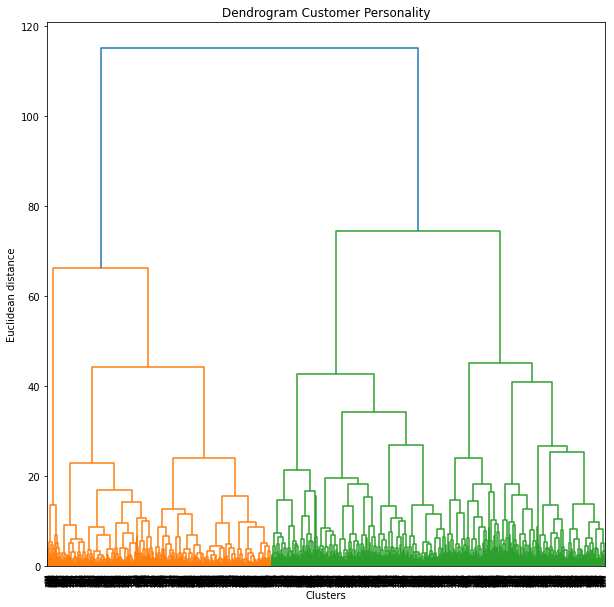

In [ ]:
# Dendrogram
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_mark_camp_standard, method='ward'))
plt.title('Dendrogram Customer Personality')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
#algorithm with n_clusters=4
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(df_mark_camp_standard)
print('Silhouette_score: ',silhouette_score(df_mark_camp_standard,y_hc))

Silhouette_score:  0.20834861561743093


In [ ]:
#Add prediction 'y' to original DF:
df_mark_camp_transformed['hc_pca'] = y_hc

**OBS:**
* Silhouette Score =0.2083 for clusters=4

### 9.4.Agglomerativen Hierachical Clustering **without** PCA

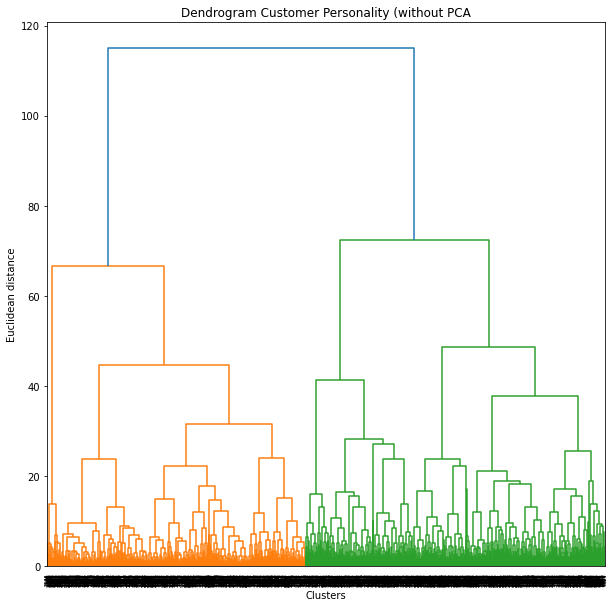

In [ ]:
# Dendrogram
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_mark_camp_scaled, method='ward'))
plt.title('Dendrogram Customer Personality (without PCA')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
#algorithm with n_clusters=4
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(df_mark_camp_scaled)
print('Silhouette_score: ',silhouette_score(df_mark_camp_scaled,y_hc))

Silhouette_score:  0.21478063308262996


In [ ]:
#Add prediction 'y' to original DF:
df_mark_camp_transformed['hc'] = y_hc

**OBS:**
*   We get 4 clusters in both cases for "Agglomerativen Hierachical Clustering". However Silhouette_score has lower value than with PCA (0.2083) comparing without PCA (0.2148) analysis, this is due to the reduction of dataset information

### 9.5.DBSCAN with PCA

In [ ]:
#import NearestNeighbors:
from sklearn.neighbors import NearestNeighbors

In [ ]:
#n_neighbors=2
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_mark_camp_standard) #DF with PCA
#Get distances and indices arrays:
distances, indices = neighbors_fit.kneighbors(df_mark_camp_standard)#DF with PCA

In [ ]:
#Sort distances array:
distances = np.sort(distances,axis=0)
distances = distances[:,1]

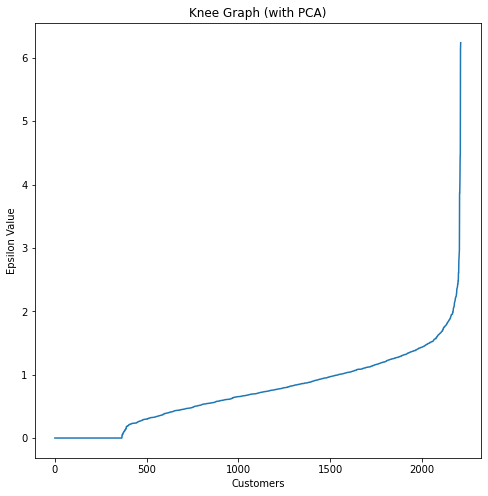

In [ ]:
##Knee graph:
fig=plt.figure(figsize=(8,8))
plt.plot(distances)
plt.title('Knee Graph (with PCA)')
plt.xlabel('Customers')
plt.ylabel('Epsilon Value')
plt.show()

**OBS:**
* Optimal Epsilon value is between 1 and 3.

In [ ]:
#Create array for epsilon values and Min_samples:
eps_values = np.arange(1,3,0.1)
min_samples = np.arange(2,10)

In [ ]:
#Iterate the combination of epsilon and min_samples
#Need to find silhouette_Score and no_of_clusters:
from itertools import product

dbscan_params = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_params:
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_mark_camp_standard)
  try:
    sil_score.append(silhouette_score(df_mark_camp_standard,y_dbscan))
  except:
    sil_score.append(0)
  no_of_clusters.append(len(np.unique(y_dbscan)))

In [ ]:
#Create dataframe for silhouette_Score and no_of_clusters:
df_param_tunning = pd.DataFrame.from_records(dbscan_params,columns=['EPS','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [ ]:
#Create DF pivot for silhouette_Score and no_of_clusters:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score',columns='EPS',index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters',columns='EPS',index='Min_samples')

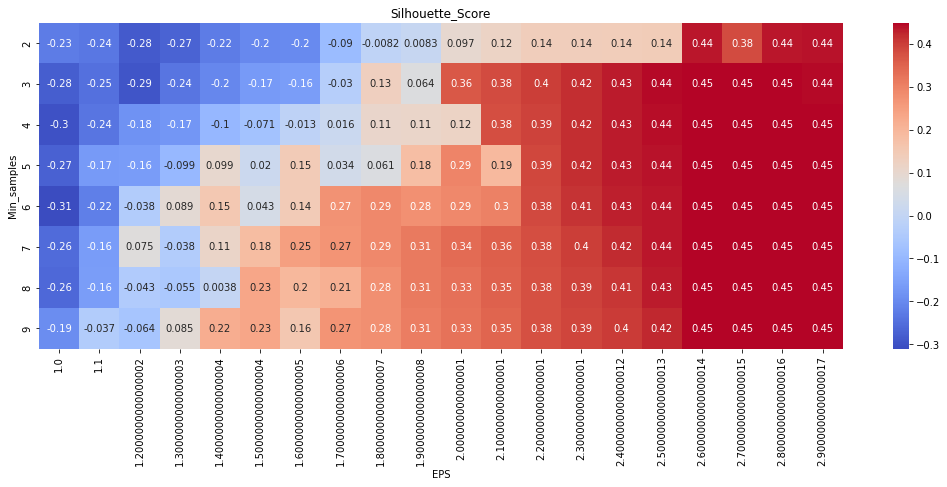

In [ ]:
#Heatmap for pivot1 (sil_score)
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10},cmap='coolwarm',ax=ax)
plt.title('Silhouette_Score')
plt.show()

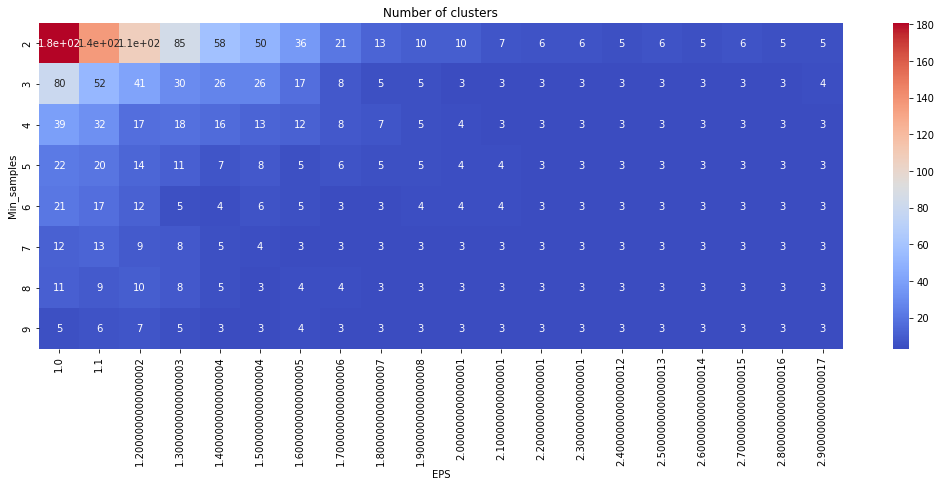

In [ ]:
#Heatmap for pivot2 (n_clusters)
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10},cmap='coolwarm',ax=ax)
plt.title('Number of clusters')
plt.show()

**OBS:**
* For number of cluster =4 and Silhouette_Score=0.44, we have min_samples=3 and epsilon = 2.9

In [ ]:
#Apply DBSCAN for eps=2.9, and min_samples=3
dbscan_train = DBSCAN(eps=2.9, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_mark_camp_standard)
#Add prediction 'y' to original DF:
df_mark_camp_transformed['dbscan_pca'] = y_dbscan

### 9.6.DBSCAN **without** PCA

In [ ]:
#n_neighbors=2
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_mark_camp_scaled) #DF without PCA
#Get distances and indices arrays:
distances, indices = neighbors_fit.kneighbors(df_mark_camp_scaled)#DF without PCA

In [ ]:
#Sort distances array:
distances = np.sort(distances,axis=0)
distances = distances[:,1]

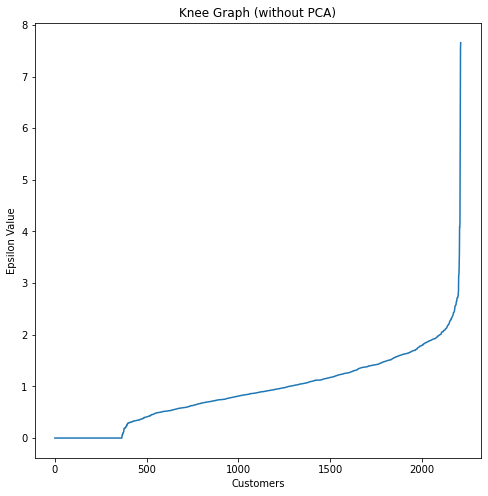

In [ ]:
##Knee graph(without PCA):
fig=plt.figure(figsize=(8,8))
plt.plot(distances)
plt.title('Knee Graph (without PCA)')
plt.xlabel('Customers')
plt.ylabel('Epsilon Value')
plt.show()

**OBS:**
* Optimal Epsilon value is between 1 and 3.

In [ ]:
#Create array for epsilon values and Min_samples:
eps_values = np.arange(1,3,0.1)
min_samples = np.arange(2,10)

In [ ]:
#Iterate the combination of epsilon and min_samples
#Need to find silhouette_Score and no_of_clusters:
from itertools import product

dbscan_params = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_params:
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_mark_camp_scaled)
  try:
    sil_score.append(silhouette_score(df_mark_camp_scaled,y_dbscan))
  except:
    sil_score.append(0)
  no_of_clusters.append(len(np.unique(y_dbscan)))

In [ ]:
#Create dataframe for silhouette_Score and no_of_clusters:
df_param_tunning = pd.DataFrame.from_records(dbscan_params,columns=['EPS','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [ ]:
#Create DF pivot for silhouette_Score and no_of_clusters:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score',columns='EPS',index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters',columns='EPS',index='Min_samples')

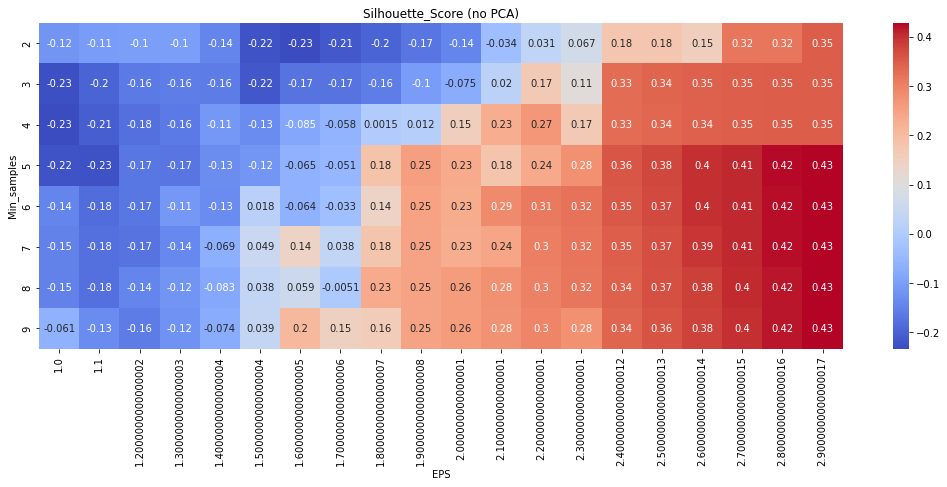

In [ ]:
#Heatmap for pivot1 (sil_score)
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10},cmap='coolwarm',ax=ax)
plt.title('Silhouette_Score (no PCA)')
plt.show()

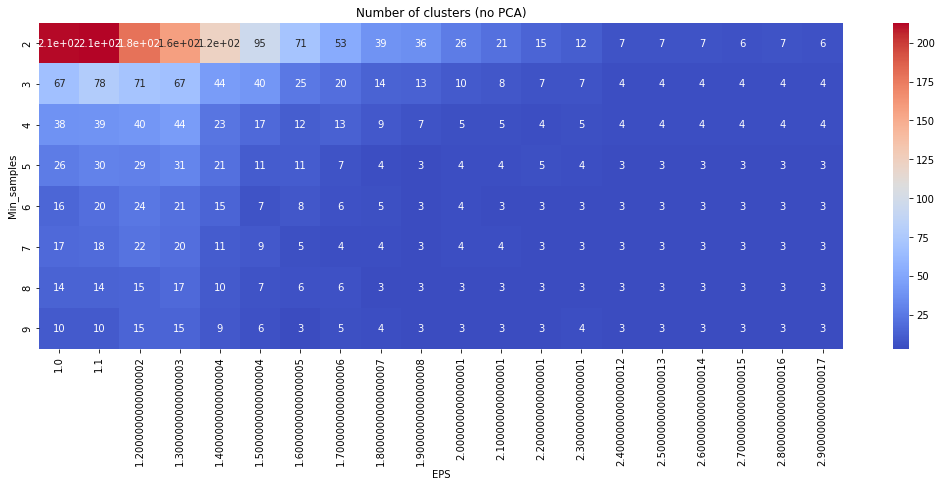

In [ ]:
#Heatmap for pivot2 (n_clusters)
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10},cmap='coolwarm',ax=ax)
plt.title('Number of clusters (no PCA)')
plt.show()

**OBS:**
* For number of cluster =4 and Silhouette_Score=0.35 (lower than analysis with PCA), we have min_samples=3 and epsilon = 2.9

In [ ]:
#Apply DBSCAN for eps=2.9, and min_samples=3
dbscan_train = DBSCAN(eps=2.9, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_mark_camp_scaled)
#Add prediction 'y' to original DF:
df_mark_camp_transformed['dbscan'] = y_dbscan

In [ ]:
#Final DataFrame:
df_mark_camp_transformed

,Income,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Year_Customer,Month_Customer,Higher_education,Children,Food,Campaign,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan
0,58138.0,88,3,8,10,4,7,2012,9,1,0,1529,1,2,8,0,0,0,0
1,46344.0,6,2,1,1,2,5,2014,3,1,2,21,0,5,5,1,1,0,0
2,71613.0,42,1,8,2,10,4,2013,8,1,0,734,0,7,6,2,0,0,0
3,26646.0,5,2,2,0,4,6,2014,2,1,1,48,0,5,0,1,1,0,0
4,58293.0,15,5,5,3,6,5,2014,1,1,1,407,0,3,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,247,2,9,3,4,5,2013,6,1,1,1094,0,13,2,0,0,0,0
2236,64014.0,8,7,8,2,5,7,2014,6,1,3,436,1,9,10,2,0,0,0
2237,56981.0,24,1,2,3,13,6,2014,1,1,0,1217,1,4,12,2,0,0,0
2238,69245.0,61,2,6,5,10,3,2014,1,1,1,782,0,4,12,2,2,0,0


## 10.Results Evaluation

In [ ]:
#Show Columns Dataframe:
df_mark_camp_transformed.columns

Index(['Income', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Year_Customer', 'Month_Customer', 'Higher_education', 'Children',
       'Food', 'Campaign', 'k_means_pca', 'k_means', 'hc_pca', 'hc',
       'dbscan_pca', 'dbscan'],
      dtype='object')

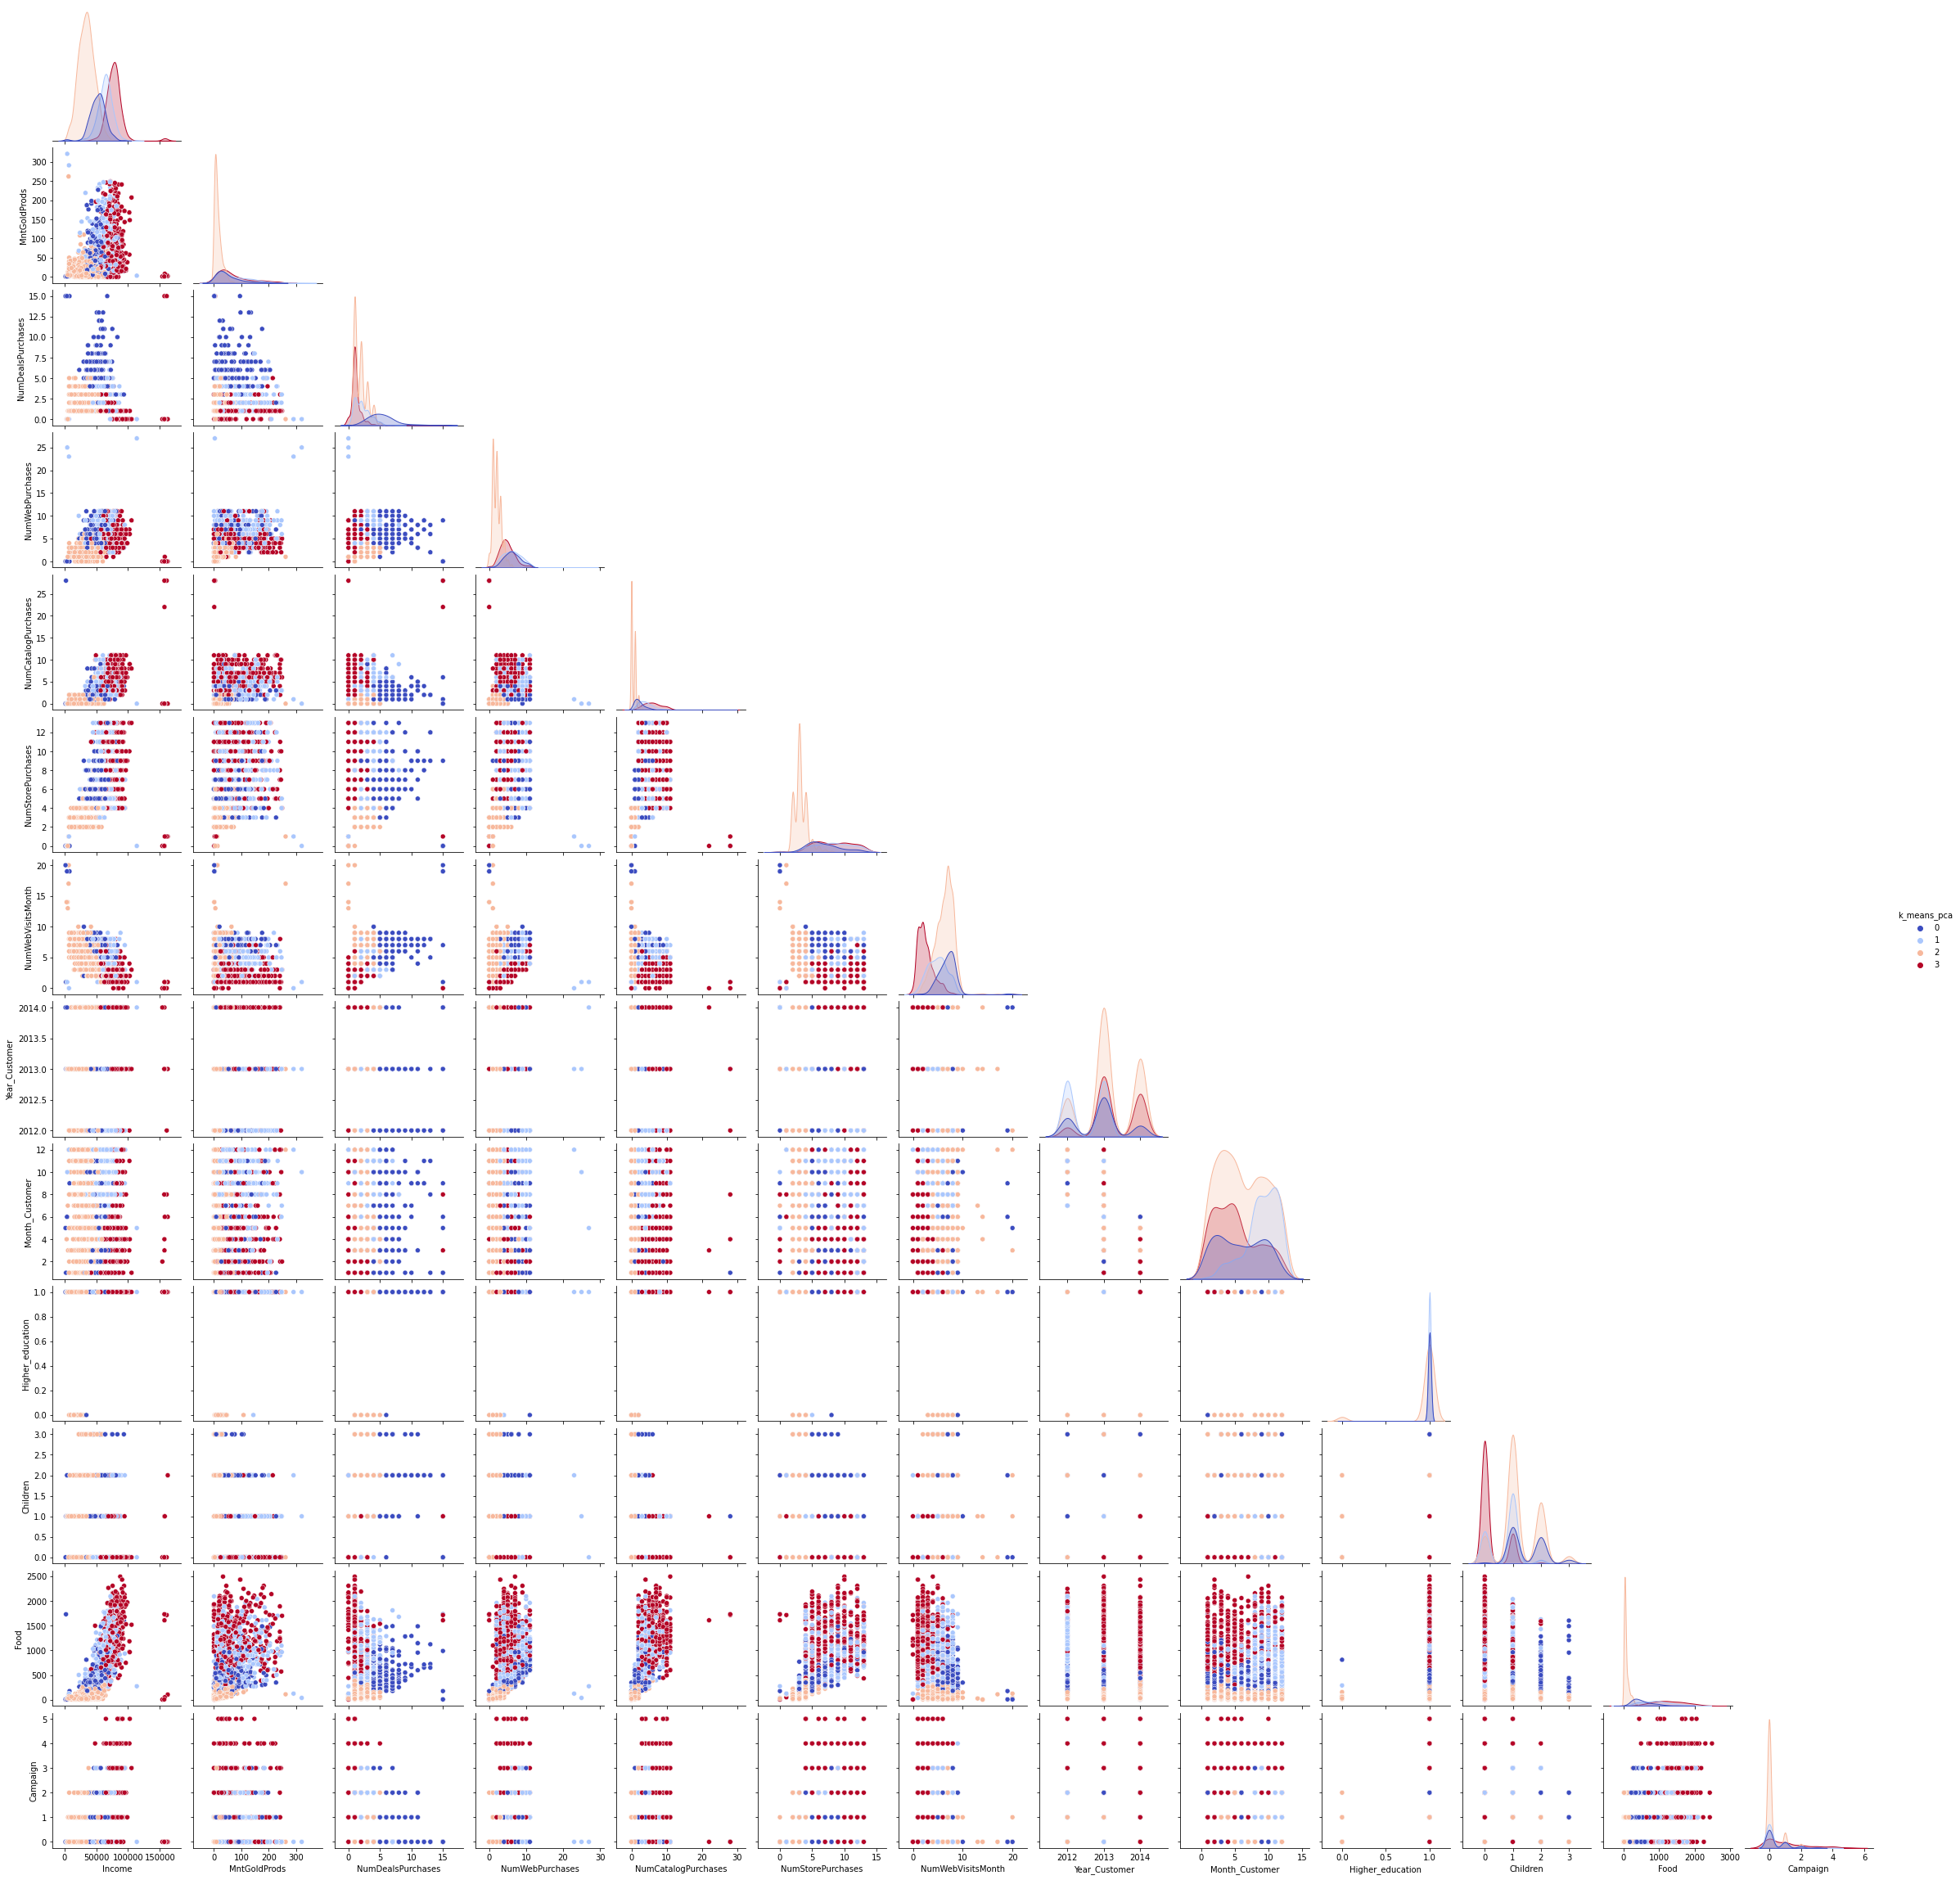

In [ ]:
#Pairplot for KMeans_PCA:
sns.pairplot(data=df_mark_camp_transformed[['Income', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                                            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                                            'Year_Customer', 'Month_Customer', 'Higher_education', 'Children',
                                            'Food', 'Campaign', 'k_means_pca']],hue='k_means_pca',palette='coolwarm',corner=True)
plt.show()

**OBS:**
* Some variables like 'Income', 'Food ,'MntGoldProds', 'NumWebPurchases', and 'NumWebVisitsMonth' shows a clarely cluster segmentacion.

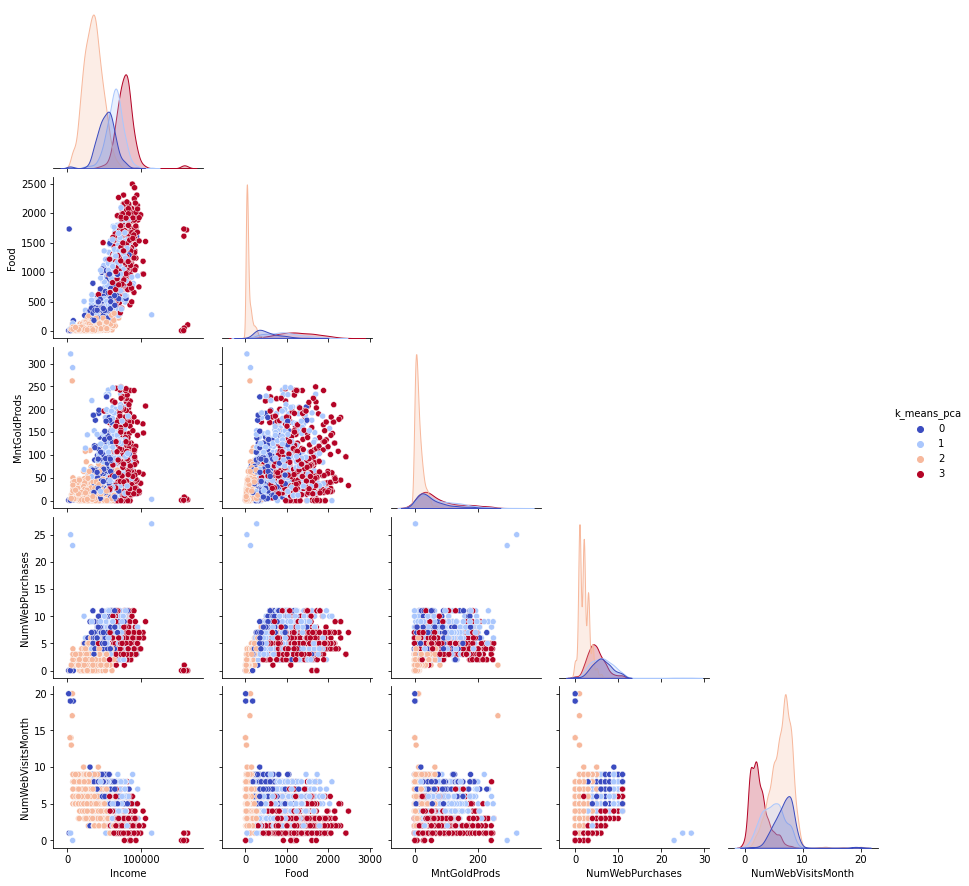

In [ ]:
# #scatterplot 'i' vs 'j':
# fig = plt.figure(figsisze=(10,10))
# sns.scatterplot(data=df_mark_camp_transformed, x='i', y='j',hue='k_means_pca',palette='coolwarm')

sns.pairplot(data=df_mark_camp_transformed[['Income','Food', 'MntGoldProds',
                                            'NumWebPurchases','NumWebVisitsMonth',
                                            'k_means_pca']],hue='k_means_pca',palette='coolwarm',corner=True)
plt.show()

**Final Observations**:
* 1.CLuster ID-2 has more presence for lower 'Income', and cluster ID-3 has more presence for higher 'Income'.
* 2.'NumWebVisitsMonth' is higher for cluster ID-2 than clouster UD-3
* 3.Both Clusther ID-0 and Cluster ID-1 has average presence.
* We could classify each cluster as follow:
  * **Premiun Consumer**:Cluster ID-3
  * **Mediun Consumer**: Cluster ID-0 and ID-1
  * **Normal Consumer**: cluster ID-2